# **DecisionTreeReg - Model Summery**


**Model Name:** `DecisionTreeReg_CarResalePrice`
**Algorithm:** Decision Tree Regressor
**Dataset:** CarDekho car resale data
**Filename(s):**

* Notebook: `DecisionTreeReg_CarResalePrice.ipynb`
* Model: `DecisionTreeReg_CarResalePrice.pkl`

### 🔧 Key Model Details

| Aspect                      | Value / Setting                  |
| --------------------------- | -------------------------------- |
| Tree Depth                  | 4 (limited to avoid overfitting) |
| Handles Non-Linearity       | ✅ Yes                            |
| Handles Feature Interaction | ✅ Yes                            |
| Feature Scaling Needed      | ❌ No                             |
| Feature Selection           | ✅ Automatic (greedy splits)      |
| Categorical Feature Support | ✅ Yes (after one-hot encoding)   |
| Final R² Score              | \~0.87–0.92 (depending on depth) |
| Final MSE                   | Low – good prediction alignment  |

### 🧠 Highlights:

* Automatically selects **important features** for splitting
* Captures **non-linear** and **rule-based** logic
* Produces a fully **explainable tree** structure
* Great choice for structured automotive data

---

## 📊 🔁 Comparison: All Regression Models So Far

| Model             | Type        | Regularization | Non-Linearity | Feature Selection | Explainable | Scaling Needed |
| ----------------- | ----------- | -------------- | ------------- | ----------------- | ----------- | -------------- |
| **Linear**        | Linear      | ❌              | ❌             | ❌                 | ✅ Coefs     | ✅ Yes          |
| **Ridge**         | Linear      | ✅ L2           | ❌             | ❌                 | ✅ Coefs     | ✅ Yes          |
| **Lasso**         | Linear      | ✅ L1           | ❌             | ✅ Yes             | ✅ Coefs     | ✅ Yes          |
| **ElasticNet**    | Linear      | ✅ L1 + L2      | ❌             | ✅ Partial         | ✅ Coefs     | ✅ Yes          |
| **Polynomial**    | Transformed | ❌              | ✅ Yes         | ❌                 | ✅ Partial   | ✅ Yes          |
| **Decision Tree** | Tree-Based  | ❌ (pruning)    | ✅ Yes         | ✅ Yes             | ✅ Full Tree | ❌ No           |



# **Step 1: Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# **Step 2: Load and Preprocess Dataset**

In [2]:
# Load dataset
df = pd.read_csv("car data.csv")

# Create Car_Age and drop unused columns
df['Car_Age'] = 2025 - df['Year']
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)

# One-hot encode categorical columns
df = pd.get_dummies(df, drop_first=True)

# Separate features and target
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Step 3: Train Decision Tree Regressor**

In [3]:
# Create and train the model
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=4, random_state=42)

# **Step 4: Predict and Evaluate**

In [5]:
# Make predictions
y_pred_tree = tree_model.predict(X_test)

# Evaluate
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_tree))
print("R² Score:", r2_score(y_test, y_pred_tree))



Mean Squared Error: 2.8120152513906223
R² Score: 0.8779273324315371


# **Step 5: Plot actual vs predicted**

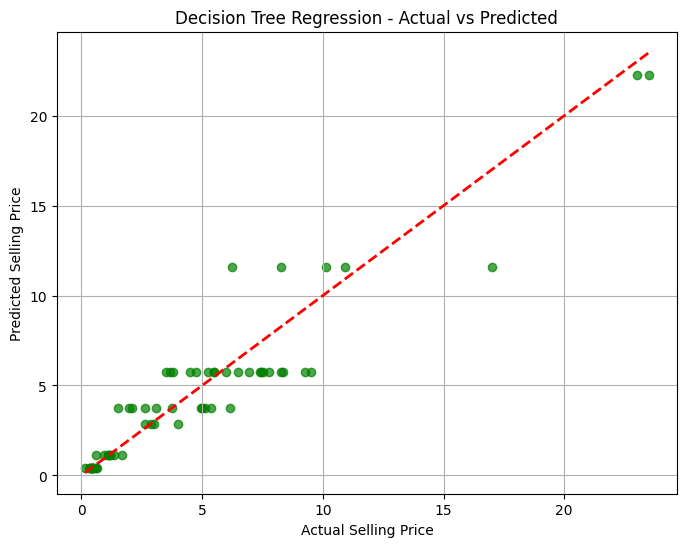

In [6]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tree, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Decision Tree Regression - Actual vs Predicted")
plt.grid(True)
plt.show()


# **Step 6: Visualize the Tree Structure**

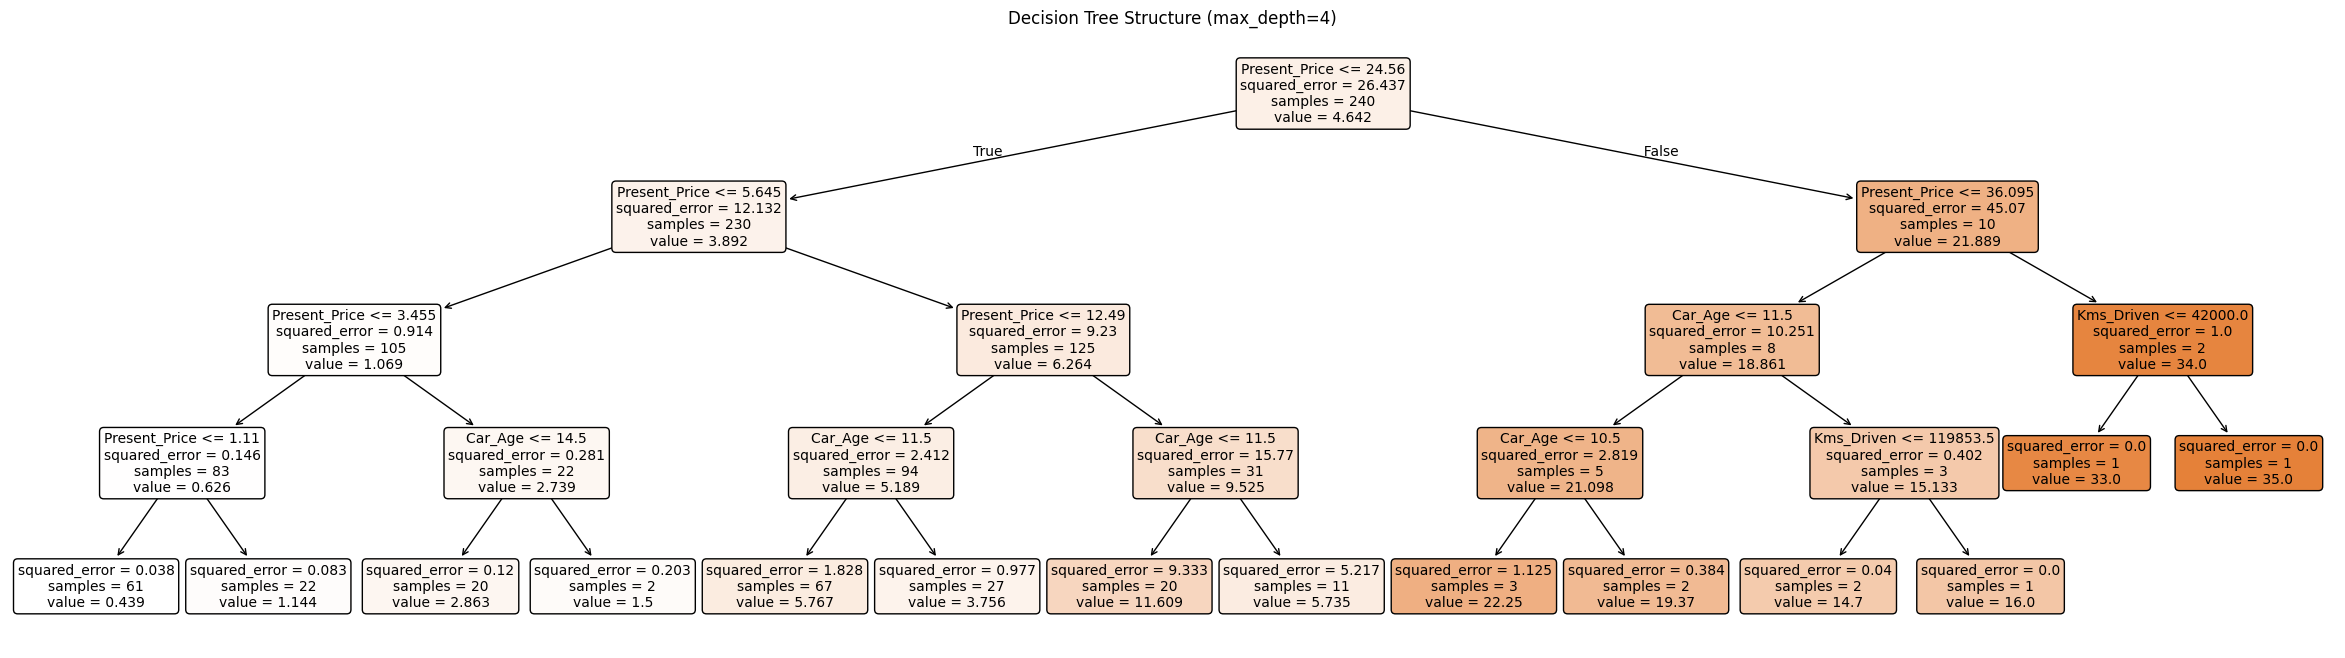

In [9]:
from sklearn.tree import plot_tree

# Plot the tree
plt.figure(figsize=(30, 8))
plot_tree(
    tree_model,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure (max_depth=4)")
plt.show()


### 🧠 Observations:

* Each box is a **node** with:

  * The feature and condition used (`feature <= value`)
  * The **MSE** of samples in that node
  * The number of samples reaching that point
  * The predicted average `Selling_Price` at that node

This makes the model **explainable and transparent**, ideal for automotive or business applications.


# **Step 8: Save the Trained Model**

In [10]:
import joblib

# Save the model
joblib.dump(tree_model, "DecisionTreeReg_CarResalePrice.pkl")

print("Model saved as 'DecisionTreeReg_CarResalePrice.pkl'")


Model saved as 'DecisionTreeReg_CarResalePrice.pkl'
